In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/07_Jul.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,27.000000,88.000000,1,7,0,2778.0,2758.0,2777.0,2320.0,2364.0,2761.0,2777.166667,2830.0
1,27.000000,88.333333,1,7,0,2765.0,2759.0,2761.0,2326.0,2340.0,2731.0,2780.500000,2801.0
2,27.000000,88.666667,1,7,0,2794.0,2748.0,2787.0,2322.0,2347.0,2709.0,2782.416667,2810.0
3,27.000000,89.000000,1,7,0,2815.0,2769.0,2762.0,2293.0,2342.0,2695.0,2783.500000,2775.0
4,27.000000,89.333333,2,7,0,2830.0,2778.0,2758.0,2280.0,2326.0,2723.0,2783.833333,2762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,30.182451,81.141470,23,3,1,3767.0,3695.0,3605.0,3638.0,3110.0,3235.0,3709.500000,3804.0
8828,30.182451,81.141470,24,3,1,3767.0,3669.0,3626.0,3658.0,3123.0,3225.0,3720.500000,3758.0
8829,30.182451,81.141470,24,3,1,3760.0,3690.0,3608.0,3653.0,3115.0,3253.0,3728.416667,3703.0
8830,30.272451,81.141470,24,3,1,3789.0,3713.0,3626.0,3633.0,3178.0,3257.0,3741.000000,3777.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   int64  
 3   B       8832 non-null   int64  
 4   C       8832 non-null   int64  
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 897.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   float64
 3   B       8832 non-null   float64
 4   C       8832 non-null   float64
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(13)
memory usage: 897.1 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.284665,-1.348421,1.239100,-1.660902,1.53858,-1.400692,-1.416140,-1.464973,-1.414460,-2.462885,-2.214015,-1.201190,-1.475443
1,-1.358968,-1.348421,1.264151,-1.660902,1.53858,-1.400692,-1.449429,-1.462414,-1.455387,-2.448042,-2.270603,-1.269101,-1.466560
2,-1.335908,-1.348421,1.289203,-1.660902,1.53858,-1.400692,-1.375169,-1.490562,-1.388881,-2.457938,-2.254098,-1.318901,-1.461452
3,-1.425584,-1.348421,1.314255,-1.660902,1.53858,-1.400692,-1.321394,-1.436825,-1.452829,-2.529678,-2.265887,-1.350593,-1.458565
4,-1.458892,-1.348421,1.339307,-1.516457,1.53858,-1.400692,-1.282983,-1.413795,-1.463061,-2.561837,-2.303612,-1.287210,-1.457676


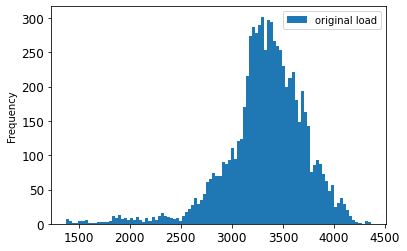

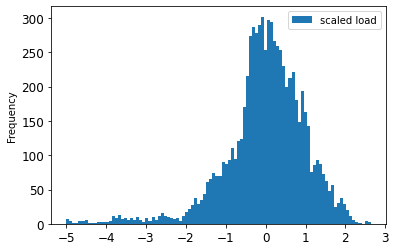

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

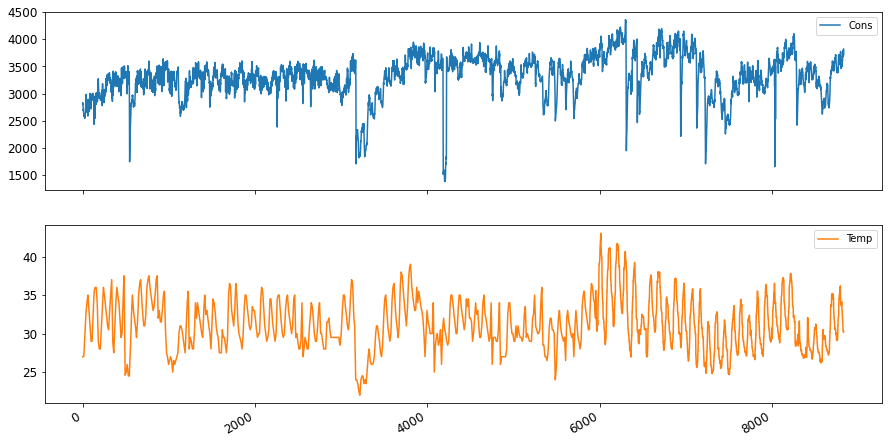

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.284665,-1.348421,1.239100,-1.660902,1.53858,-1.400692,-1.416140,-1.464973,-1.414460,-2.462885,-2.214015,-1.201190,-1.475443,-1.054072
1,-1.358968,-1.348421,1.264151,-1.660902,1.53858,-1.400692,-1.449429,-1.462414,-1.455387,-2.448042,-2.270603,-1.269101,-1.466560,-1.123250
2,-1.335908,-1.348421,1.289203,-1.660902,1.53858,-1.400692,-1.375169,-1.490562,-1.388881,-2.457938,-2.254098,-1.318901,-1.461452,-1.136061
3,-1.425584,-1.348421,1.314255,-1.660902,1.53858,-1.400692,-1.321394,-1.436825,-1.452829,-2.529678,-2.265887,-1.350593,-1.458565,-1.059196
4,-1.458892,-1.348421,1.339307,-1.516457,1.53858,-1.400692,-1.282983,-1.413795,-1.463061,-2.561837,-2.303612,-1.287210,-1.457676,-1.082256
5,-1.487075,-1.348421,1.364358,-1.516457,1.53858,-1.400692,-1.357244,-1.447061,-1.460503,-2.571732,-2.381421,-1.427558,-1.459453,-1.169369
6,-1.645929,-1.348421,1.389410,-1.516457,1.53858,-1.400692,-1.334197,-1.372853,-1.488640,-2.603891,-2.334264,-1.463777,-1.472556,-0.905467
7,-1.594686,-1.348421,1.414462,-1.516457,1.53858,-1.400692,-1.423822,-1.319116,-1.434923,-2.591522,-2.341338,-1.543005,-1.485881,-0.931089
8,-1.648491,-1.348421,1.439513,-1.372011,1.53858,-1.400692,-1.457111,-1.280733,-1.411902,-2.643472,-2.336622,-1.678826,-1.505868,-0.943899
9,-1.661301,-1.348421,1.464565,-1.372011,1.53858,-1.400692,-1.485279,-1.354941,-1.445155,-2.668210,-2.386137,-1.954994,-1.524079,-1.048948


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.284665,-1.348421,1.239100,-1.660902,1.53858,-1.400692,-1.416140,-1.464973,-1.414460,-2.462885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665
1,-1.358968,-1.348421,1.264151,-1.660902,1.53858,-1.400692,-1.449429,-1.462414,-1.455387,-2.448042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968
2,-1.335908,-1.348421,1.289203,-1.660902,1.53858,-1.400692,-1.375169,-1.490562,-1.388881,-2.457938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908
3,-1.425584,-1.348421,1.314255,-1.660902,1.53858,-1.400692,-1.321394,-1.436825,-1.452829,-2.529678,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584
4,-1.458892,-1.348421,1.339307,-1.516457,1.53858,-1.400692,-1.282983,-1.413795,-1.463061,-2.561837,...,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892
5,-1.487075,-1.348421,1.364358,-1.516457,1.53858,-1.400692,-1.357244,-1.447061,-1.460503,-2.571732,...,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075
6,-1.645929,-1.348421,1.389410,-1.516457,1.53858,-1.400692,-1.334197,-1.372853,-1.488640,-2.603891,...,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929
7,-1.594686,-1.348421,1.414462,-1.516457,1.53858,-1.400692,-1.423822,-1.319116,-1.434923,-2.591522,...,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929,-1.594686
8,-1.648491,-1.348421,1.439513,-1.372011,1.53858,-1.400692,-1.457111,-1.280733,-1.411902,-2.643472,...,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929,-1.594686,-1.648491
9,-1.661301,-1.348421,1.464565,-1.372011,1.53858,-1.400692,-1.485279,-1.354941,-1.445155,-2.668210,...,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929,-1.594686,-1.648491,-1.661301


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,-0.180379,-1.319875,1.314540,1.372460,-0.919225,0.713933,-0.481483,-0.246942,-0.265948,-0.845025,...,-0.206000,-0.249557,-0.413534,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379
7384,-0.203438,-1.319875,1.314540,1.516906,-0.919225,0.713933,-0.412344,-0.410710,-0.521741,-0.798023,...,-0.249557,-0.413534,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438
7385,-0.170130,-1.319875,1.314540,1.516906,-0.919225,0.713933,-0.345766,-0.438858,-0.498720,-0.807918,...,-0.413534,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130
7386,-0.193189,-1.375453,1.333631,1.516906,-0.919225,0.713933,-0.161395,-0.418387,-0.202000,-1.003348,...,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189
7387,-0.234184,-1.431032,1.352723,1.516906,-0.919225,0.713933,-0.179320,-0.479800,-0.245485,-0.847499,...,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184
7388,-0.300800,-1.431032,1.352723,1.661352,-0.919225,0.713933,-0.202366,-0.410710,-0.409192,-0.887080,...,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800
7389,-0.270054,-1.431032,1.352723,1.661352,-0.919225,0.713933,-0.169077,-0.344179,-0.437330,-0.832656,...,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054
7390,-0.203438,-1.495873,1.352723,1.661352,-0.919225,0.713933,-0.192123,-0.159939,-0.416866,-0.642174,...,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054,-0.203438
7391,-0.267492,-1.495873,1.379874,1.661352,-0.919225,0.713933,-0.233095,-0.177851,-0.478256,-0.600120,...,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054,-0.203438,-0.267492
7392,-0.298238,-1.495873,1.379874,-1.660902,-0.427664,0.713933,-0.299673,-0.200881,-0.409192,-0.600120,...,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054,-0.203438,-0.267492,-0.298238


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,-1.115563,-1.196368,1.253306,1.228014,-1.410786,-1.400692,-1.221526,-1.311440,-1.081929,0.451242,...,-1.205239,-1.315411,-1.425584,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563
7284,-1.089942,-1.196368,1.253306,1.372460,-1.410786,-1.400692,-1.239451,-1.421472,-1.138203,0.461137,...,-1.315411,-1.425584,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942
7285,-1.031013,-1.196368,1.253306,1.372460,-1.410786,-1.400692,-1.234330,-1.390765,-1.199594,0.493296,...,-1.425584,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013
7286,-0.938775,-1.420225,1.516603,1.372460,-1.410786,-1.400692,-1.149827,-1.234673,-1.199594,0.641724,...,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775
7287,-0.915716,-1.644081,1.779900,1.372460,-1.410786,-1.400692,-1.113977,-1.219320,-1.309585,0.812416,...,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716
7288,-0.867035,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.088370,-1.237232,-1.419576,0.770361,...,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035
7289,-0.877283,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.029474,-1.232114,-1.388881,0.762940,...,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283
7290,-1.079693,-1.679590,1.775440,1.516906,-1.410786,-1.400692,-0.937288,-1.147671,-1.232847,0.760466,...,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283,-1.079693
7291,-0.918278,-1.715099,1.770980,1.516906,-1.410786,-1.400692,-0.914242,-1.111846,-1.217499,0.795099,...,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283,-1.079693,-0.918278
7292,-0.959272,-1.715099,1.770980,1.661352,-1.410786,-1.400692,-0.865588,-1.086257,-1.235405,0.881682,...,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283,-1.079693,-0.918278,-0.959272


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.990018
11,-0.946462
12,-0.972083
13,-0.974645
14,-0.984894
...,...
7288,-0.300800
7289,-0.270054
7290,-0.203438
7291,-0.267492


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-1.704858,-1.348421,1.489617,-1.372011,1.538580,-1.400692,-1.644043,-1.331911,-1.370975,-2.665736,-2.480450,-1.977631,-1.552505
11,-1.763788,-1.348421,1.514669,-1.372011,1.538580,-1.400692,-1.592828,-1.421472,-1.317259,-2.685527,-2.397926,-2.072705,-1.590704
12,-1.779160,-1.348421,1.539720,-1.227565,1.538580,-1.400692,-1.646603,-1.454737,-1.278890,-2.769635,-2.459230,-2.063651,-1.633565
13,-1.894457,-1.284094,1.458302,-1.227565,1.538580,-1.400692,-1.659407,-1.482885,-1.353070,-2.799321,-2.506386,-1.993477,-1.679981
14,-1.866274,-1.219767,1.376884,-1.227565,1.538580,-1.400692,-1.702939,-1.641536,-1.330048,-2.868587,-2.492239,-1.950467,-1.725952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.867035,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.088370,-1.237232,-1.419576,0.770361,1.440632,1.211887,-1.163640
7289,-0.877283,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.029474,-1.232114,-1.388881,0.762940,1.409980,1.134922,-1.118779
7290,-1.079693,-1.679590,1.775440,1.516906,-1.410786,-1.400692,-0.937288,-1.147671,-1.232847,0.760466,1.421770,1.306962,-1.105010
7291,-0.918278,-1.715099,1.770980,1.516906,-1.410786,-1.400692,-0.914242,-1.111846,-1.217499,0.795099,1.384044,1.295643,-1.078582


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3185.0,26.522451,89.873120,1.0,3.0,1.0,3226.0,3265.0,3196.0,3069.0,3728.0,3988.0,3238.416667
7394,3194.0,26.327451,90.455945,1.0,3.0,1.0,3252.0,3256.0,3268.0,3066.0,3736.0,3968.0,3232.250000
7395,3166.0,26.132450,91.038770,1.0,3.0,1.0,3227.0,3240.0,3261.0,3019.0,3729.0,3933.0,3224.333333
7396,3133.0,26.132450,91.038770,2.0,3.0,1.0,3215.0,3214.0,3252.0,3019.0,3659.0,3897.0,3214.416667
7397,3097.0,26.132450,91.038770,2.0,3.0,1.0,3185.0,3226.0,3265.0,2982.0,3590.0,3914.0,3200.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3387.0,27.322450,91.371080,24.0,5.0,1.0,3411.0,3304.0,3218.0,4019.0,3970.0,3825.0,3358.750000
8350,3453.0,27.362452,91.371080,24.0,5.0,1.0,3415.0,3379.0,3207.0,4100.0,3999.0,3833.0,3379.250000
8351,3467.0,27.362452,90.833920,24.0,5.0,1.0,3433.0,3407.0,3270.0,4062.0,3995.0,3827.0,3395.666667
8352,3468.0,27.362452,90.833920,1.0,6.0,1.0,3419.0,3420.0,3253.0,4070.0,3968.0,3851.0,3413.583333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,1.491855,2.279097,-0.137011
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,1.513297,2.224740,-0.153955
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,1.494535,2.129614,-0.175707
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,1.306916,2.031771,-0.202954
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,1.121977,2.077975,-0.241421
7398,-0.462389,-1.412305,1.335665,-1.513750,-0.579955,0.499675,-0.249148,-0.094378,-0.082086,-0.881215,1.100535,2.020899,-0.273935
7399,-0.554640,-1.361759,1.282998,-1.513750,-0.579955,0.499675,-0.322974,-0.160307,-0.124288,-0.905354,1.033528,1.999156,-0.310799
7400,-0.799762,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.409983,-0.191953,-0.192865,-0.918765,0.915596,1.931210,-0.363004
7401,-0.638983,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.504902,-0.271068,-0.161214,-0.961679,0.829827,1.833366,-0.403989
7402,-0.673247,-1.518291,1.324769,-1.369419,-0.579955,0.499675,-0.460079,-0.247334,-0.092637,-1.012641,0.845909,1.814341,-0.453904


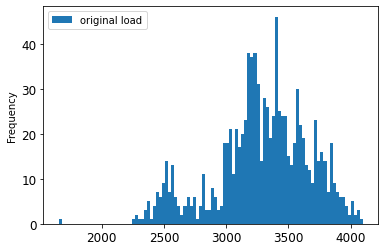

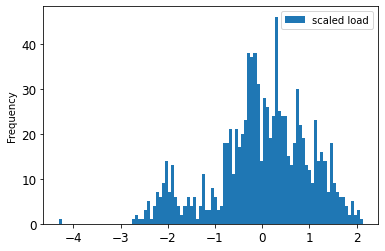

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,1.491855,2.279097,-0.137011,-2.038550
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,1.513297,2.224740,-0.153955,-1.999014
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,1.494535,2.129614,-0.175707,-1.999014
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,1.306916,2.031771,-0.202954,-2.028007
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,1.121977,2.077975,-0.241421,-2.059636
7398,-0.462389,-1.412305,1.335665,-1.513750,-0.579955,0.499675,-0.249148,-0.094378,-0.082086,-0.881215,1.100535,2.020899,-0.273935,-2.064907
7399,-0.554640,-1.361759,1.282998,-1.513750,-0.579955,0.499675,-0.322974,-0.160307,-0.124288,-0.905354,1.033528,1.999156,-0.310799,-2.117622
7400,-0.799762,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.409983,-0.191953,-0.192865,-0.918765,0.915596,1.931210,-0.363004,-2.178243
7401,-0.638983,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.504902,-0.271068,-0.161214,-0.961679,0.829827,1.833366,-0.403989,-2.199329
7402,-0.673247,-1.518291,1.324769,-1.369419,-0.579955,0.499675,-0.460079,-0.247334,-0.092637,-1.012641,0.845909,1.814341,-0.453904,-2.244136


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.275253
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.275253,-0.251532
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.275253,-0.251532,-0.325332
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.275253,-0.251532,-0.325332,-0.412311
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,...,NaN,NaN,NaN,NaN,NaN,-0.275253,-0.251532,-0.325332,-0.412311,-0.507197
7398,-0.462389,-1.412305,1.335665,-1.513750,-0.579955,0.499675,-0.249148,-0.094378,-0.082086,-0.881215,...,NaN,NaN,NaN,NaN,-0.275253,-0.251532,-0.325332,-0.412311,-0.507197,-0.462389
7399,-0.554640,-1.361759,1.282998,-1.513750,-0.579955,0.499675,-0.322974,-0.160307,-0.124288,-0.905354,...,NaN,NaN,NaN,-0.275253,-0.251532,-0.325332,-0.412311,-0.507197,-0.462389,-0.554640
7400,-0.799762,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.409983,-0.191953,-0.192865,-0.918765,...,NaN,NaN,-0.275253,-0.251532,-0.325332,-0.412311,-0.507197,-0.462389,-0.554640,-0.799762
7401,-0.638983,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.504902,-0.271068,-0.161214,-0.961679,...,NaN,-0.275253,-0.251532,-0.325332,-0.412311,-0.507197,-0.462389,-0.554640,-0.799762,-0.638983
7402,-0.673247,-1.518291,1.324769,-1.369419,-0.579955,0.499675,-0.460079,-0.247334,-0.092637,-1.012641,...,-0.275253,-0.251532,-0.325332,-0.412311,-0.507197,-0.462389,-0.554640,-0.799762,-0.638983,-0.673247


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8244,1.690994,0.907953,-0.455956,1.372873,-0.003002,0.499675,1.454124,1.226841,1.218246,1.605150,...,1.271915,1.221836,1.177029,1.435329,1.453780,1.451144,1.419515,1.582930,1.698902,1.690994
8245,1.630373,0.907953,-0.455956,1.372873,-0.003002,0.499675,1.422484,1.182009,1.152306,1.653429,...,1.221836,1.177029,1.435329,1.453780,1.451144,1.419515,1.582930,1.698902,1.690994,1.630373
8246,2.007281,0.699243,-0.308521,1.372873,-0.003002,0.499675,1.585956,1.440451,1.344850,1.782173,...,1.177029,1.435329,1.453780,1.451144,1.419515,1.582930,1.698902,1.690994,1.630373,2.007281
8247,2.025731,0.490534,-0.161087,1.372873,-0.003002,0.499675,1.701968,1.458911,1.278911,1.787537,...,1.435329,1.453780,1.451144,1.419515,1.582930,1.698902,1.690994,1.630373,2.007281,2.025731
8248,1.909759,0.490534,-0.161087,1.517204,-0.003002,0.499675,1.694058,1.456274,1.228796,1.704390,...,1.453780,1.451144,1.419515,1.582930,1.698902,1.690994,1.630373,2.007281,2.025731,1.909759
8249,1.883402,0.490534,-0.161087,1.517204,-0.003002,0.499675,1.633415,1.424628,1.183957,1.522003,...,1.451144,1.419515,1.582930,1.698902,1.690994,1.630373,2.007281,2.025731,1.909759,1.883402
8250,1.725259,0.528037,-0.168733,1.517204,-0.003002,0.499675,2.010455,1.588132,1.442441,1.602468,...,1.419515,1.582930,1.698902,1.690994,1.630373,2.007281,2.025731,1.909759,1.883402,1.725259
8251,1.646187,0.565539,-0.176378,1.517204,-0.003002,0.499675,2.028912,1.704168,1.460904,1.674886,...,1.582930,1.698902,1.690994,1.630373,2.007281,2.025731,1.909759,1.883402,1.725259,1.646187
8252,1.659366,0.565539,-0.176378,1.661535,-0.003002,0.499675,1.912900,1.696256,1.458267,1.763398,...,1.698902,1.690994,1.630373,2.007281,2.025731,1.909759,1.883402,1.725259,1.646187,1.659366
8253,1.922938,0.565539,-0.176378,1.661535,-0.003002,0.499675,1.886533,1.635601,1.426616,1.884095,...,1.690994,1.630373,2.007281,2.025731,1.909759,1.883402,1.725259,1.646187,1.659366,1.922938


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-2.262586
7404,-2.236229
7405,-2.246772
7406,-2.275765
7407,-2.233594
...,...
8249,0.257162
8250,0.431120
8251,0.468020
8252,0.470656


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7403,-0.789219,-1.674823,1.366539,-1.369419,-0.579955,0.499675,-0.552362,-0.321174,-0.158577,-1.077012,0.773542,1.836084,-0.508170
7404,-0.847205,-1.674823,1.366539,-1.225087,-0.579955,0.499675,-0.797569,-0.408201,-0.190228,-1.149431,0.679732,1.789880,-0.564726
7405,-0.978991,-1.674823,1.366539,-1.225087,-0.579955,0.499675,-0.636734,-0.503138,-0.269355,-1.101152,0.366140,1.719215,-0.625860
7406,-1.034341,-1.660148,1.413879,-1.225087,-0.579955,0.499675,-0.671011,-0.458307,-0.245617,-1.157477,0.374181,1.643115,-0.693864
7407,-1.092327,-1.645473,1.461219,-1.225087,-0.579955,0.499675,-0.787023,-0.550607,-0.319470,-1.195028,0.374181,1.732805,-0.760494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,1.883402,0.490534,-0.161087,1.517204,-0.003002,0.499675,1.633415,1.424628,1.183957,1.522003,1.491855,0.887546,1.757024
8250,1.725259,0.528037,-0.168733,1.517204,-0.003002,0.499675,2.010455,1.588132,1.442441,1.602468,1.553501,1.012568,1.782210
8251,1.646187,0.565539,-0.176378,1.517204,-0.003002,0.499675,2.028912,1.704168,1.460904,1.674886,1.647311,1.056054,1.798925
8252,1.659366,0.565539,-0.176378,1.661535,-0.003002,0.499675,1.912900,1.696256,1.458267,1.763398,1.644630,1.137590,1.817014


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
30/30 [==============================] - 3s 91ms/step - loss: 0.9085 - val_loss: 0.6694
Epoch 2/300
30/30 [==============================] - 2s 67ms/step - loss: 0.9032 - val_loss: 0.6644
Epoch 3/300
30/30 [==============================] - 2s 70ms/step - loss: 0.8952 - val_loss: 0.6597
Epoch 4/300
30/30 [==============================] - 2s 60ms/step - loss: 0.8895 - val_loss: 0.6551
Epoch 5/300
30/30 [==============================] - 2s 53ms/step - loss: 0.8860 - val_loss: 0.6507
Epoch 6/300
30/30 [==============================] - 2s 53ms/step - loss: 0.8810 - val_loss: 0.6466
Epoch 7/300
30/30 [==============================] - 2s 64ms/step - loss: 0.8757 - val_loss: 0.6428
Epoch 8/300
30/30 [==============================] - 2s 52ms/step - loss: 0.8714 - val_loss: 0.6388
Epoch 9/300
30/30 [==============================] - 2s 58ms/step - loss: 0.8687 - val_loss: 0.6354
Epoch 10/300
30/30 [==============================] - 2s 57ms/step - loss: 0.8627 - val_loss: 0.6321

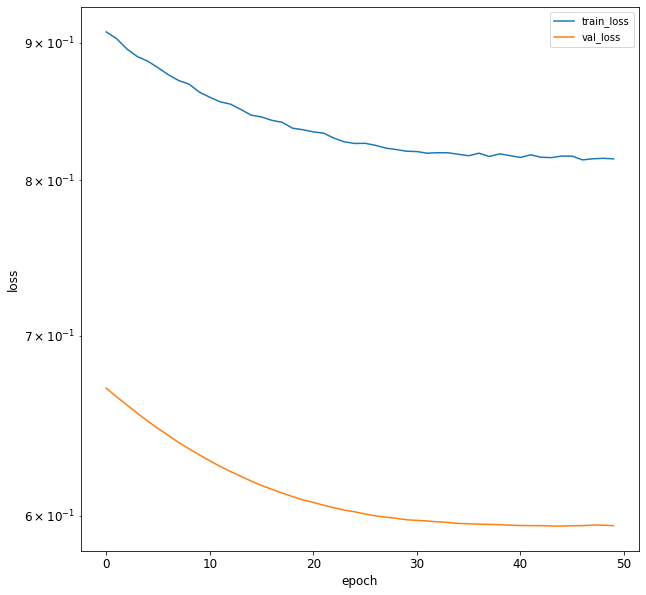

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,3434.0,27.247451,91.724085,1.0,6.0,1.0,3453.0,3415.0,3379.0,4025.0,3954.0,3798.0,3428.916667
8355,3389.0,27.132450,92.614250,1.0,6.0,1.0,3467.0,3433.0,3407.0,4023.0,3929.0,3754.0,3427.416667
8356,3392.0,27.132450,92.614250,2.0,6.0,1.0,3468.0,3419.0,3420.0,3960.0,3867.0,3715.0,3425.083333
8357,3360.0,27.132450,92.614250,2.0,6.0,1.0,3433.0,3387.0,3411.0,3881.0,3842.0,3678.0,3420.833333
8358,3323.0,27.127451,92.368057,2.0,6.0,1.0,3434.0,3453.0,3415.0,3814.0,3852.0,3712.0,3413.166667
8359,3329.0,27.122452,92.121864,2.0,6.0,1.0,3389.0,3467.0,3433.0,3760.0,3849.0,3688.0,3404.500000
8360,3301.0,27.122452,92.121864,3.0,6.0,1.0,3392.0,3468.0,3419.0,3722.0,3832.0,3665.0,3394.666667
8361,3265.0,27.122452,92.121864,3.0,6.0,1.0,3360.0,3433.0,3387.0,3654.0,3799.0,3376.0,3384.500000
8362,3245.0,26.957452,92.498527,3.0,6.0,1.0,3323.0,3434.0,3453.0,3633.0,3795.0,3618.0,3367.166667
8363,3250.0,26.792452,92.875190,3.0,6.0,1.0,3329.0,3389.0,3467.0,3653.0,3773.0,3566.0,3349.083333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


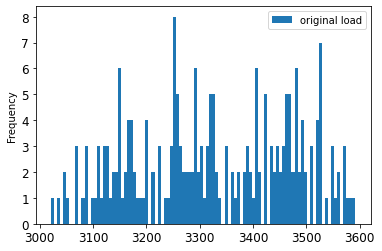

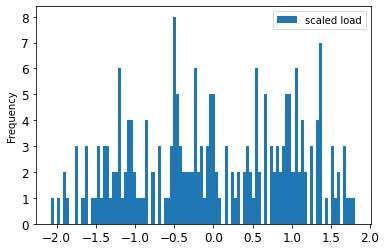

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.738066,-0.689761,0.809018,-1.498364,0.037858,1.12041,0.834739,0.544808,0.263776,2.612007,1.186843,0.423200,0.723413,1.023781
8355,0.431942,-0.768607,0.942258,-1.498364,0.037858,1.12041,0.931200,0.670815,0.462427,2.604448,1.117000,0.116089,0.712030,0.846910
8356,0.452350,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.938090,0.572810,0.554658,2.366356,0.943790,-0.156124,0.694323,0.649630
8357,0.234663,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.696938,0.348797,0.490806,2.067797,0.873947,-0.414377,0.662071,0.581603
8358,-0.017039,-0.772034,0.905408,-1.357685,0.037858,1.12041,0.703828,0.810823,0.519185,1.814587,0.901884,-0.177063,0.603891,0.520378
8359,0.023778,-0.775461,0.868558,-1.357685,0.037858,1.12041,0.393774,0.908828,0.646889,1.610509,0.893503,-0.344579,0.538123,0.397928
8360,-0.166699,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.414445,0.915828,0.547564,1.466897,0.846009,-0.505114,0.463501,0.180241
8361,-0.411598,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.193962,0.670815,0.320533,1.209909,0.753817,-2.522278,0.386349,0.016975
8362,-0.547653,-0.888586,0.924937,-1.217006,0.037858,1.12041,-0.060971,0.677815,0.788783,1.130545,0.742642,-0.833165,0.254812,-0.030644
8363,-0.513639,-1.001711,0.981316,-1.217006,0.037858,1.12041,-0.019630,0.362798,0.888109,1.206130,0.681180,-1.196115,0.117583,-0.057855


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,0.738066,-0.689761,0.809018,-1.498364,0.037858,1.12041,0.834739,0.544808,0.263776,2.612007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.738066
8355,0.431942,-0.768607,0.942258,-1.498364,0.037858,1.12041,0.931200,0.670815,0.462427,2.604448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.738066,0.431942
8356,0.452350,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.938090,0.572810,0.554658,2.366356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.738066,0.431942,0.452350
8357,0.234663,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.696938,0.348797,0.490806,2.067797,...,NaN,NaN,NaN,NaN,NaN,NaN,0.738066,0.431942,0.452350,0.234663
8358,-0.017039,-0.772034,0.905408,-1.357685,0.037858,1.12041,0.703828,0.810823,0.519185,1.814587,...,NaN,NaN,NaN,NaN,NaN,0.738066,0.431942,0.452350,0.234663,-0.017039
8359,0.023778,-0.775461,0.868558,-1.357685,0.037858,1.12041,0.393774,0.908828,0.646889,1.610509,...,NaN,NaN,NaN,NaN,0.738066,0.431942,0.452350,0.234663,-0.017039,0.023778
8360,-0.166699,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.414445,0.915828,0.547564,1.466897,...,NaN,NaN,NaN,0.738066,0.431942,0.452350,0.234663,-0.017039,0.023778,-0.166699
8361,-0.411598,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.193962,0.670815,0.320533,1.209909,...,NaN,NaN,0.738066,0.431942,0.452350,0.234663,-0.017039,0.023778,-0.166699,-0.411598
8362,-0.547653,-0.888586,0.924937,-1.217006,0.037858,1.12041,-0.060971,0.677815,0.788783,1.130545,...,NaN,0.738066,0.431942,0.452350,0.234663,-0.017039,0.023778,-0.166699,-0.411598,-0.547653
8363,-0.513639,-1.001711,0.981316,-1.217006,0.037858,1.12041,-0.019630,0.362798,0.888109,1.206130,...,0.738066,0.431942,0.452350,0.234663,-0.017039,0.023778,-0.166699,-0.411598,-0.547653,-0.513639


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8461,0.016975,-0.631485,1.182727,-1.076327,0.611132,-0.89253,0.545356,1.216845,1.654337,-0.619243,...,1.377524,1.261877,1.023781,0.846910,0.649630,0.581603,0.520378,0.397928,0.180241,0.016975
8462,-0.030644,-0.854307,1.214762,-1.076327,0.611132,-0.89253,0.483345,0.971832,1.526632,-0.638139,...,1.261877,1.023781,0.846910,0.649630,0.581603,0.520378,0.397928,0.180241,0.016975,-0.030644
8463,-0.057855,-1.077129,1.246797,-1.076327,0.611132,-0.89253,0.359324,0.789822,1.491159,-0.581450,...,1.023781,0.846910,0.649630,0.581603,0.520378,0.397928,0.180241,0.016975,-0.030644,-0.057855
8464,-0.520442,-1.077129,1.246797,-0.935648,0.611132,-0.89253,0.138842,0.586810,1.320886,-0.509645,...,0.846910,0.649630,0.581603,0.520378,0.397928,0.180241,0.016975,-0.030644,-0.057855,-0.520442
8465,-0.010236,-1.077129,1.246797,-0.935648,0.611132,-0.89253,-0.026520,0.516807,1.200276,-0.570113,...,0.649630,0.581603,0.520378,0.397928,0.180241,0.016975,-0.030644,-0.057855,-0.520442,-0.010236


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-0.520442
8365,-0.010236
8366,-0.023842
8367,0.057791
8368,0.064594
...,...
8461,-1.221125
8462,-1.193914
8463,-1.193914
8464,-1.500037


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8364,-0.867382,-1.001711,0.981316,-1.076327,0.037858,1.12041,-0.212552,0.383799,0.895204,1.134324,0.521938,-1.182155,-0.053163
8365,-1.057859,-1.001711,0.981316,-1.076327,0.037858,1.12041,-0.460595,0.159787,0.646889,1.054960,0.446508,-1.244974,-0.219481
8366,-1.091873,-0.994856,0.749956,-1.076327,0.037858,1.12041,-0.598397,-0.099227,0.653984,1.062519,0.494001,-1.244974,-0.389594
8367,-0.989831,-0.988000,0.518596,-1.076327,0.037858,1.12041,-0.563946,-0.057225,0.334723,1.160779,0.572225,-1.175176,-0.521764
8368,-0.860579,-0.988000,0.518596,-0.935648,0.037858,1.12041,-0.922230,-0.253236,0.356007,1.175896,0.594575,-1.049539,-0.643815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0.016975,-0.631485,1.182727,-1.076327,0.611132,-0.89253,0.545356,1.216845,1.654337,-0.619243,0.234185,-0.337599,0.865701
8462,-0.030644,-0.854307,1.214762,-1.076327,0.611132,-0.89253,0.483345,0.971832,1.526632,-0.638139,0.239772,-0.218942,0.716457
8463,-0.057855,-1.077129,1.246797,-1.076327,0.611132,-0.89253,0.359324,0.789822,1.491159,-0.581450,0.312409,-0.023507,0.567845
8464,-0.520442,-1.077129,1.246797,-0.935648,0.611132,-0.89253,0.138842,0.586810,1.320886,-0.509645,0.323584,0.032331,0.391408


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.9920566082000732s


In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3325.504717
dtype: float64
Cons    147.347431
dtype: float64


In [46]:
load_mean=3325.504717
load_std=147.347431
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


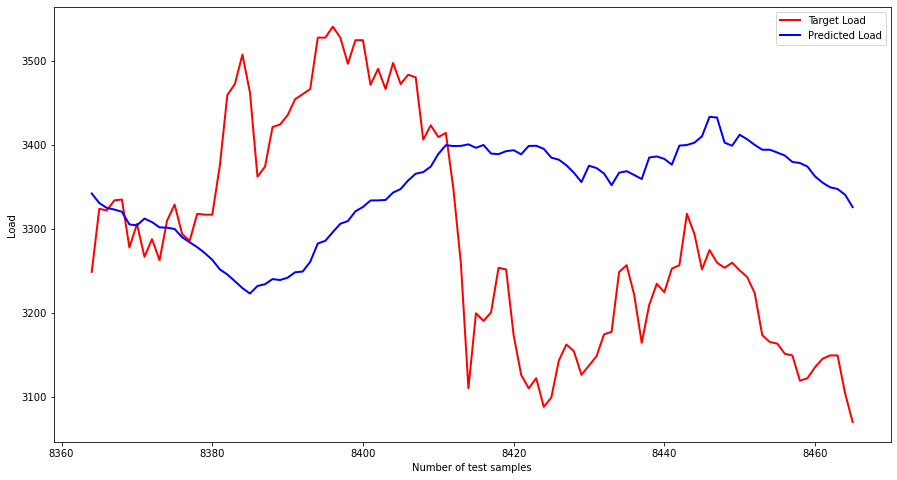

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

4.823048912214755


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -1.794488
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  324779.020254
8365  332299.439724
8366  332099.080351
8367  333302.339450
8368  333402.685170
...             ...
8461  314450.852426
8462  314852.110821
8463  314852.177205
8464  310340.201632
8465  306931.438074

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364   8706.570647
8365     46.040292
8366      8.964845
8367    120.117315
8368    213.141850
...            ...
8461  43903.778817
8462  39993.502618
8463  39161.613950
8464  55782.312300
8465  65321.344157

[102 rows x 1 columns]
y_t+100    31523.852371
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    177.549577
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3342.128]
[3330.7817]
[3324.9858]
[3323.0603]
[3320.423]
[3305.354]
[3304.2957]
[3312.2754]
[3308.1536]
[3301.8682]
[3301.5205]
[3299.9043]
[3290.1555]
[3284.1138]
[3278.3567]
[3271.3594]
[3263.252]
[3251.9531]
[3245.801]
[3237.8867]
[3229.6326]
[3223.2075]
[3232.1577]
[3234.273]
[3240.4004]
[3239.2212]
[3242.0388]
[3248.4912]
[3249.3877]
[3260.897]
[3282.6855]
[3285.8423]
[3296.2888]
[3306.1685]
[3309.3809]
[3320.9827]
[3326.1404]
[3333.8438]
[3333.97]
[3334.4668]
[3343.2815]
[3347.4636]
[3357.6377]
[3365.662]
[3367.6003]
[3374.1594]
[3389.153]
[3399.5662]
[3398.5923]
[3398.762]
[3400.615]
[3396.451]
[3399.858]
[3389.6326]
[3388.9426]
[3392.4768]
[3393.613]
[3388.7334]
[3398.6797]
[3398.9263]
[3395.2415]
[3384.8076]
[3382.3362]
[3375.7505]
[3366.8303]
[3355.7842]
[3375.211]
[3372.4019]
[3365.8884]
[3352.0742]
[3366.8608]
[3368.7126]
[3364.133]
[3359.342]
[3384.9373]
[3386.2305]
[3383.3396]
[3376.4082]
[3399.123]
[3399.7803]
[3402.5945]
[3410.1675]
[3433.3374]
[3432.4326]
[3402.6108]
